In [1]:
#aim: Understand autocorrelation, Partial Autocorrelation Function, ARMA, and apply thesetechniques in projects.

#ACF: Shows the similarity between the current observations and the lagged observations.
#Correlation is always calculated using the Pearson Correlation formula.
#It calculates the correlation between the t and (t-k) time period. It includes all the lags or intervals between t and (t-k) time periods.

#PACF: The PACF determines the partial correlation between time period t and t-k. It doesn’t take into consideration all the time lags between t and t-k.
#AR: 
#MA:This kind of model calculates the residuals or errors of past time series and calculates the present or future values in the series in know as Moving Average (MA) model.

#ARMA: This is a model that is combined from the AR and MA models. In this model, the impact of previous lags along with the residuals is considered for forecasting the future values of the time series.



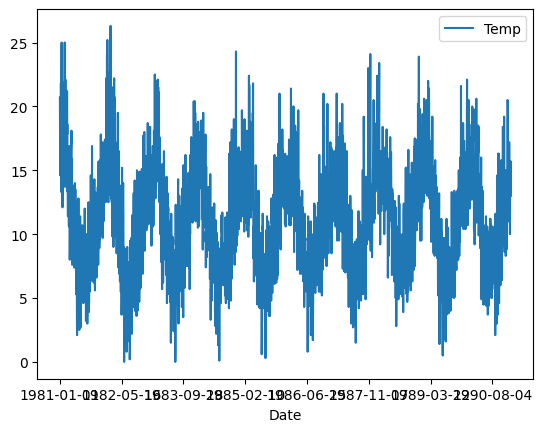

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.plot()
pyplot.show()

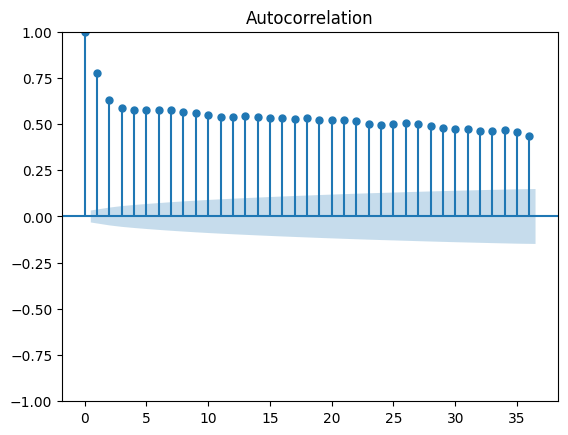

In [4]:
#plotting ACF
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series)
plt.show()

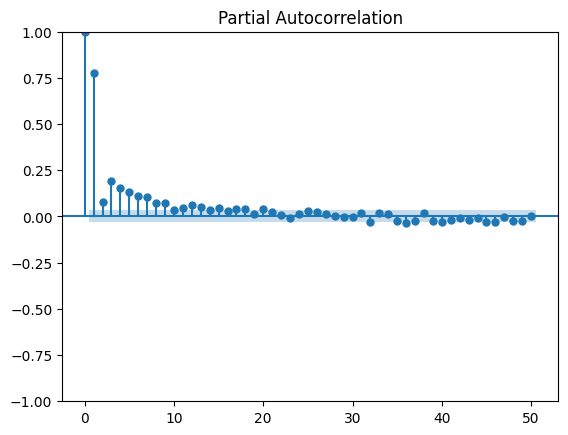

In [6]:
# plotting PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series,lags = 50) #for the first 50 lags
plt.show()

In [8]:
#Calculating ACf
import statsmodels.api as sm
sm.tsa.stattools.acf(series, nlags=50)

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 , 0.39770945, 0.39419355, 0.38880674, 0.38362529,
       0.37228746, 0.35971673, 0.35762669, 0.35038459, 0.33983402,
       0.3374702 ])

In [9]:
#Calculating PACF
sm.tsa.stattools.pacf(series,nlags = 50)

array([ 1.00000000e+00,  7.74480188e-01,  7.69967354e-02,  1.89378212e-01,
        1.52077360e-01,  1.29865030e-01,  1.09568428e-01,  1.03327644e-01,
        7.45056358e-02,  7.03482742e-02,  3.55381182e-02,  4.81691131e-02,
        6.07294005e-02,  5.11669771e-02,  3.27945796e-02,  4.56316737e-02,
        3.19459154e-02,  3.96736558e-02,  4.14138296e-02,  1.43357948e-02,
        4.17345142e-02,  2.54088527e-02,  9.07251051e-03, -1.05401455e-02,
        1.51891384e-02,  3.12732258e-02,  2.49338406e-02,  1.08841876e-02,
        3.27713852e-03, -2.82073030e-03, -7.32043583e-04,  1.83783280e-02,
       -2.81567694e-02,  1.67149069e-02,  1.38738151e-02, -2.54148624e-02,
       -3.57835685e-02, -2.19418344e-02,  1.72736570e-02, -2.64840213e-02,
       -3.05245322e-02, -1.80468470e-02, -9.65653485e-03, -1.87736669e-02,
       -9.03894700e-03, -2.80190118e-02, -3.12990147e-02, -5.42006157e-03,
       -2.52432472e-02, -2.34617756e-02,  4.39972213e-04])

# Air pass


In [23]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.tsatools import lagmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

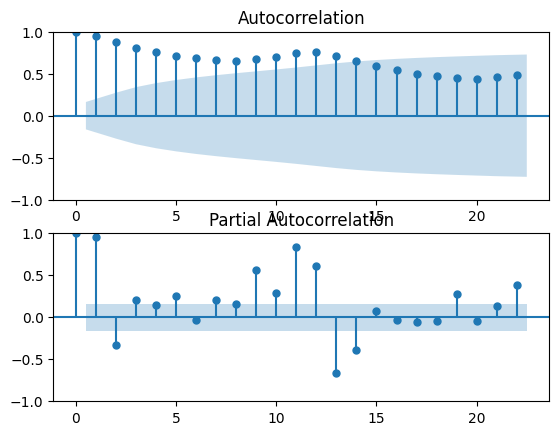

In [24]:
df = pd.read_csv("airpass.csv",header=0,index_col=0)
df.index = pd.to_datetime(df.index)
fig,ax = plt.subplots(2,1)
plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1], method='ols');

In [25]:
acf(df,nlags=10)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [26]:
#replicating ACF function
y = df['#Passengers']
acf_list = []
mu = y.mean()
for lag in range(0, 11):
    acf_list.append(np.dot((y - mu).iloc[lag:], (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu) ** 2))
np.array(acf_list)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [27]:
#PACF
pacf(df,nlags=10)

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805])

In [28]:
pacf(df,nlags=10,method='ols')

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])